In [515]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [516]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [517]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [518]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [519]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [520]:
sales['Date'].dtype

dtype('<M8[ns]')

In [521]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [522]:
sales['day'] = (sales['Date']).dt.day
sales['month'] = (sales['Date']).dt.month
sales['year'] = (sales['Date']).dt.year

In [523]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,15.256000,1.993000,2019.0
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,8.693563,0.835254,0.0
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,31.000000,3.000000,2019.0


In [524]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Time',
 'Payment']

In [525]:
print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


Text(0.5, 1.0, 'Ratings by Branch')

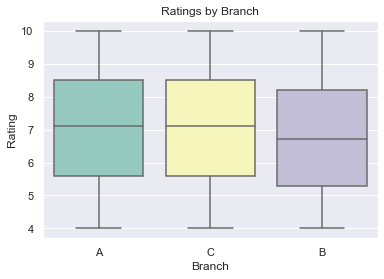

In [526]:
 sns.boxplot(x="Branch", y = "Rating" ,data =sales,palette="Set3").set_title("Ratings by Branch") 

<AxesSubplot:xlabel='count', ylabel='Product line'>

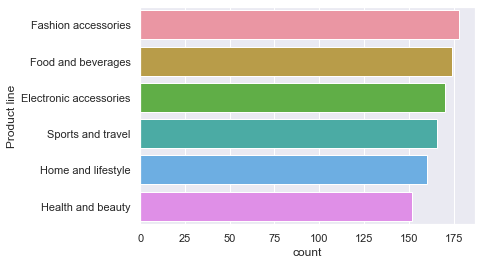

In [527]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

Text(0.5, 1.0, 'Payment Channel')

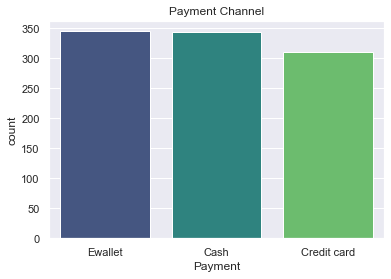

In [528]:
 sns.countplot(x="Payment", data =sales,palette='viridis').set_title("Payment Channel") 

Text(0.5, 1.0, 'Payment Channel by Branch')

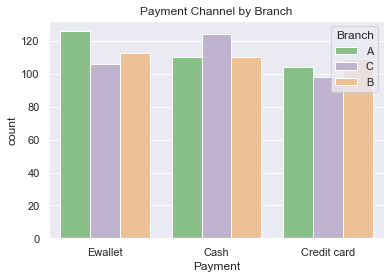

In [529]:
 sns.countplot(x="Payment", hue = "Branch", data =sales,palette='Accent').set_title("Payment Channel by Branch") 

Text(0.5, 1.0, 'Customer Type')

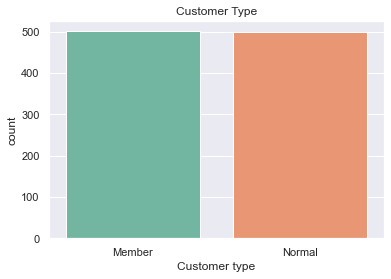

In [530]:
sales['Customer type'].nunique()
sns.countplot(x="Customer type", data =sales,palette="Set2").set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

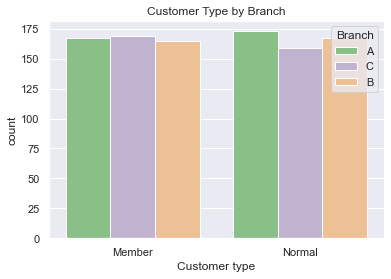

In [531]:
sns.countplot(x="Customer type", hue = "Branch", data =sales,palette='Accent').set_title("Customer Type by Branch") 

In [532]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<AxesSubplot:xlabel='Customer type', ylabel='Total'>

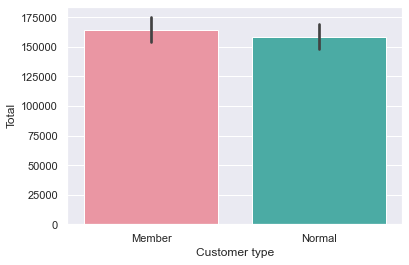

In [533]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

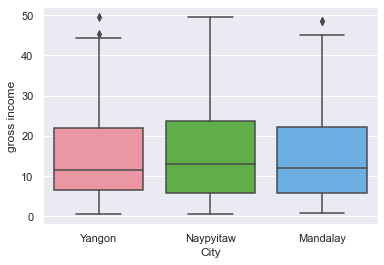

In [534]:
sns.boxplot(x=sales['City'], y=sales['gross income'])
plt.show()

In [535]:
sales.groupby('City')['gross income'].mean()

City
Mandalay     15.232024
Naypyitaw    16.052367
Yangon       14.874001
Name: gross income, dtype: float64

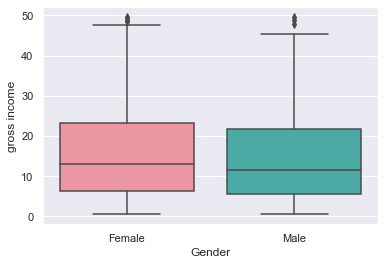

In [536]:
sns.boxplot(x=sales['Gender'], y=sales['gross income'])
plt.show()

In [537]:
sales.groupby('Gender')['gross income'].mean()

Gender
Female    15.956936
Male      14.799487
Name: gross income, dtype: float64

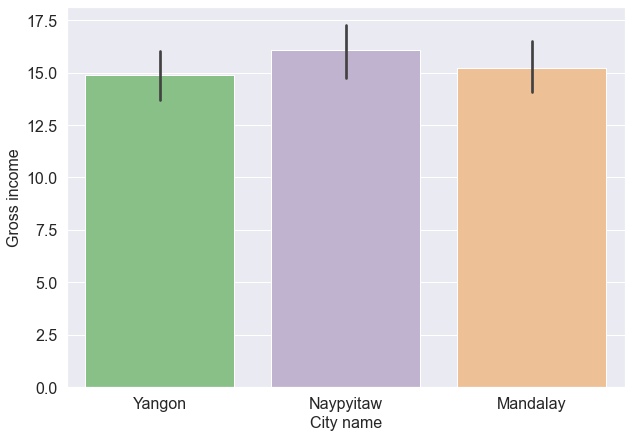

In [538]:
plt.figure(figsize=(10,7))
sns.barplot(sales['City'],sales['gross income'],palette='Accent')
plt.xlabel('City name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')
plt.show()

In [539]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [540]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [541]:
cols=['Invoice ID','Date','year','Time']
sales.drop(sales[cols],axis=1,inplace=True)

<AxesSubplot:>

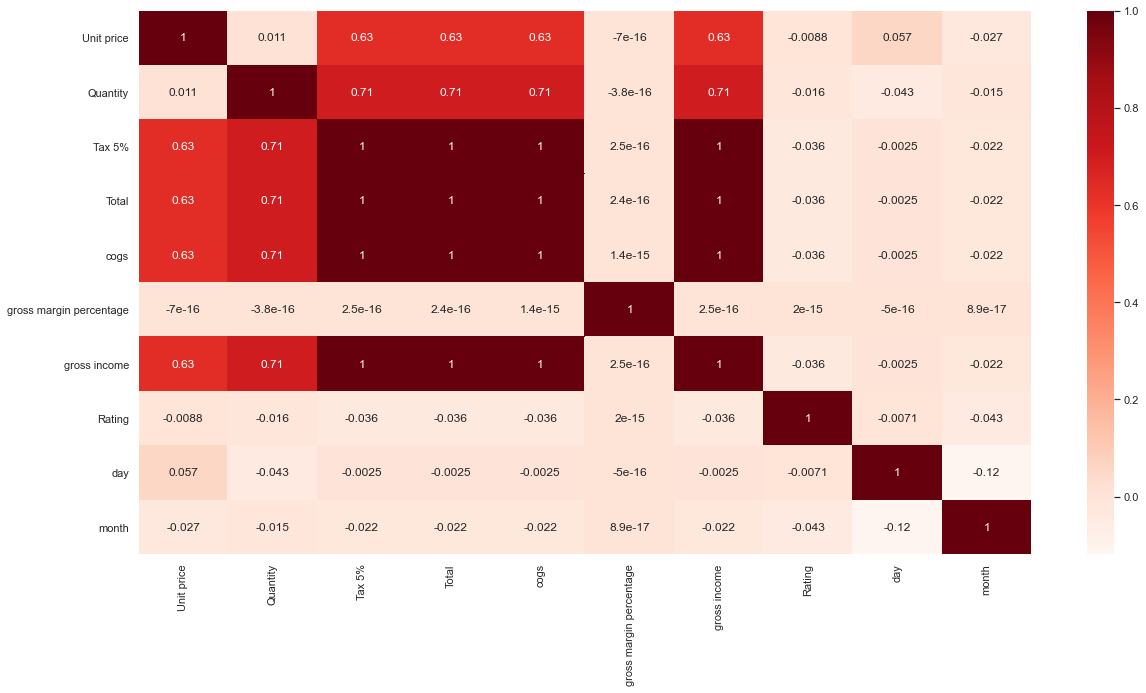

In [542]:
corr=sales.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True ,cmap = "Reds")

In [543]:
sales['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [544]:
objList = sales.select_dtypes(include = "object").columns       # extracting object data type from dataset
print (objList)         

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype='object')


In [545]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for features in objList:
    sales[features] = le.fit_transform(sales[features])
sales.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   int32  
 1   City                     1000 non-null   int32  
 2   Customer type            1000 non-null   int32  
 3   Gender                   1000 non-null   int32  
 4   Product line             1000 non-null   int32  
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   int32  
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
 14  day                      

In [546]:
sales.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,day,month
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1,5,1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6,8,3
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4,3,3
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4,27,1
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,8,2


In [547]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
train=scale.fit_transform(sales)


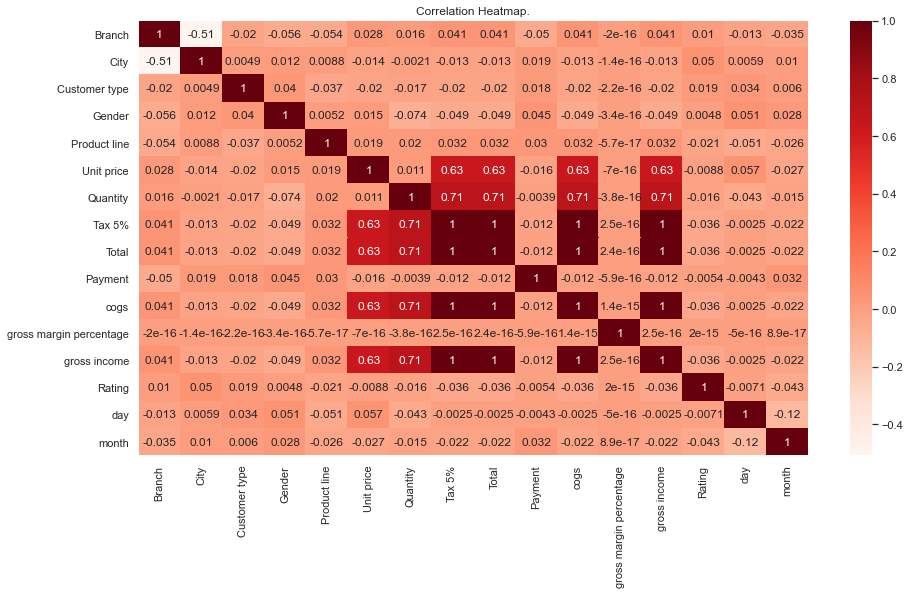

In [548]:
plt.figure(figsize=(15,8))
sns.heatmap(sales.corr(),annot=True,cmap=plt.cm.Reds).set_title('Correlation Heatmap.')
plt.show()

There are no corelated variables with Rating.

if we choose Rating as a target variable it effects our model performance.

So we can't use Supervised Machine Learning Algorithms here.

And clearly we get know that this dataset is used for analysis.

In order to apply ML model we have to go with Un-Supervised ML.

So we are using KMeans Clustering algorithm.

from sklearn.cluster import KMeans

# Evaluating the model performance

In [549]:
model = KMeans(n_clusters=4, init="k-means++",random_state=0)
model.fit(sales)

KMeans(n_clusters=4, random_state=0)

In [550]:
clusters = model.fit_predict(sales)
clusters

array([2, 0, 3, 2, 2, 2, 2, 1, 0, 0, 0, 0, 3, 2, 1, 2, 2, 2, 0, 0, 2, 3,
       0, 0, 3, 2, 0, 0, 2, 3, 2, 1, 1, 3, 2, 0, 3, 2, 2, 3, 0, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 1, 1, 3, 0, 3, 2, 0, 3, 0,
       0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 2, 3, 0, 3, 3, 2, 2, 3,
       0, 2, 3, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 3, 3, 3, 1, 0, 2, 3, 1,
       0, 3, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2, 1, 3, 2,
       0, 2, 2, 3, 0, 3, 2, 2, 1, 1, 1, 0, 2, 3, 3, 3, 2, 3, 3, 3, 1, 0,
       1, 2, 0, 3, 1, 2, 3, 0, 3, 0, 2, 3, 1, 1, 3, 2, 3, 2, 0, 3, 0, 3,
       0, 0, 2, 3, 2, 3, 0, 3, 0, 0, 1, 3, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0,
       0, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 1, 3, 1, 2, 0, 3, 0, 0, 3, 1, 0,
       3, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 3, 2, 3, 0, 3, 0, 0, 3, 0,
       3, 3, 1, 2, 3, 0, 3, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 3, 1, 0, 0, 3,
       0, 1, 0, 1, 3, 3, 3, 0, 3, 0, 2, 3, 3, 2, 1, 2, 2, 0, 0, 2, 3, 3,
       0, 3, 3, 1, 2, 3, 0, 0, 0, 3, 0, 2, 3, 0, 3,

Plot for the gross income and unit price of the items bought


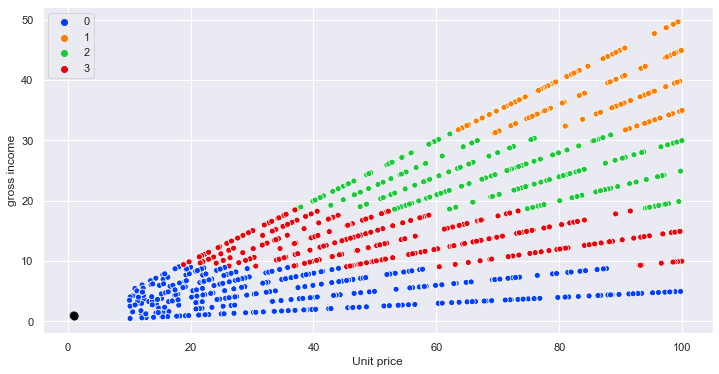

In [551]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=sales, x="Unit price", y="gross income", hue= clusters, palette = "bright")
centers = model.cluster_centers_
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha = 0.6)
plt.xlabel("Unit price")
plt.ylabel("gross income")
plt.show()

Clustering the data

In [552]:
clusters = pd.DataFrame(model.fit_predict(sales), columns=['clusters'])
richcustomers = sales.loc[clusters['clusters'] == 1]
notrichcustomers = sales.loc[clusters['clusters'] == 0]

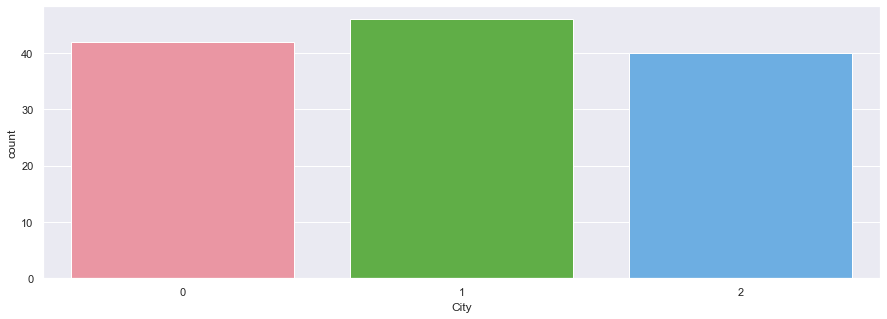

In [553]:
plt.figure(figsize=(15,5))
sns.set_palette(['red'])
sns.countplot(richcustomers['City'])
plt.show()

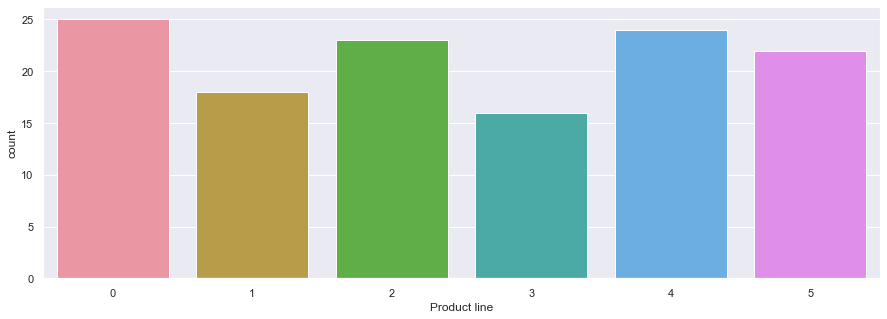

In [554]:
plt.figure(figsize=(15,5))
sns.set_palette(['red'])
sns.countplot(richcustomers['Product line'])
plt.show()